In [1]:
import requests
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime
import scipy.stats as st
from config import bls_api_key

# Set data range for all API calls
start_year = "2006"
end_year = "2018"

# Demographic unemployment rate Data Pull

In [2]:
# Pull gender, race, educational attainment, and age data from Bureau of Labor Statistics

url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"content-type": "application/json"}

target_series = ["LNS14000000", 
                 "LNS14000001", 
                 "LNS14000002", 
                 "LNS14000003", 
                 "LNS14000006", 
                 "LNS14032183", 
                 "LNS14000009",
                 "LNS14027659", 
                 "LNS14027660", 
                 "LNS14027689",
                 "LNS14027662", 
                 "LNS14024887",
                 "LNS14000089", 
                 "LNS14000091",
                 "LNS14000093",
                 "LNS14024230",
                ]

#start_year = "2008"
#end_year = "2018"

parameters = json.dumps({"seriesid": target_series,
             "startyear": start_year,
             "endyear": end_year,
             "registrationkey": bls_api_key})

p = requests.post(url, data=parameters, headers=headers)

json_data = json.loads(p.text)

json_data

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 1169,
 'message': [],
 'Results': {'series': [{'seriesID': 'LNS14000000',
    'data': [{'year': '2018',
      'period': 'M12',
      'periodName': 'December',
      'value': '3.9',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M11',
      'periodName': 'November',
      'value': '3.7',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M10',
      'periodName': 'October',
      'value': '3.8',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M09',
      'periodName': 'September',
      'value': '3.7',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M08',
      'periodName': 'August',
      'value': '3.8',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M07',
      'periodName': 'July',
      'value': '3.8',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M06',
      'periodName': 'June',
      'value': '4.0',
      'footnotes': [{}]},
    

In [36]:
#fill fit year and month into columns
years = []
months = []
periods = []
Year_M  = []

for data_point in np.arange(len(json_data["Results"]["series"][0]["data"])):
        years.append(json_data["Results"]["series"][0]["data"][data_point]["year"])
        periods.append(json_data["Results"]["series"][0]["data"][data_point]["period"][1:])
        months.append(json_data["Results"]["series"][0]["data"][data_point]["periodName"])
        Year_M.append(f"{json_data['Results']['series'][0]['data'][data_point]['year']}-\
                      {json_data['Results']['series'][0]['data'][data_point]['period'][1:]}")

In [38]:
# Create DataFrame with place holders for unemployment categories

layoffs_df = pd.DataFrame({"Years": years,
                           "Periods": periods,
                           "Months": months,
                           "Year_Month": Year_M,
                           "LNS14000000":"", 
                           "LNS14000001":"", 
                           "LNS14000002":"", 
                           "LNS14000003":"", 
                           "LNS14000006":"", 
                           "LNS14032183":"", 
                           "LNS14000009":"",
                           "LNS14027659":"", 
                           "LNS14027660":"", 
                           "LNS14027689":"",
                           "LNS14027662":"", 
                           "LNS14024887":"",
                           "LNS14000089":"", 
                           "LNS14000091":"",
                           "LNS14000093":"",
                           "LNS14024230":""
                          })
layoffs_df.set_index(["Years", "Periods","Year_Month","Months","LNS14000000","LNS14000001","LNS14000002","LNS14000003","LNS14000006",
                       "LNS14032183","LNS14000009","LNS14027659","LNS14027660","LNS14027689","LNS14027662","LNS14024887",
                       "LNS14000089","LNS14000091","LNS14000093","LNS14024230"])
layoffs_df.head()

,Years,Periods,Months,Year_Month,LNS14000000,LNS14000001,LNS14000002,LNS14000003,LNS14000006,LNS14032183,LNS14000009,LNS14027659,LNS14027660,LNS14027689,LNS14027662,LNS14024887,LNS14000089,LNS14000091,LNS14000093,LNS14024230
0,2018,12,December,2018- 12,,,,,,,,,,,,,,,,
1,2018,11,November,2018- 11,,,,,,,,,,,,,,,,
2,2018,10,October,2018- 10,,,,,,,,,,,,,,,,
3,2018,09,September,2018- 09,,,,,,,,,,,,,,,,
4,2018,08,August,2018- 08,,,,,,,,,,,,,,,,


In [39]:
# Fills in values

for series in np.arange(len(json_data["Results"]["series"])):
    for data_point in np.arange(len(json_data["Results"]["series"][series]["data"])):
        layoffs_df.loc[data_point, json_data["Results"]["series"][series]["seriesID"]] =\
        json_data["Results"]["series"][series]["data"][data_point]["value"]
   
      
layoffs_df.head()

,Years,Periods,Months,Year_Month,LNS14000000,LNS14000001,LNS14000002,LNS14000003,LNS14000006,LNS14032183,LNS14000009,LNS14027659,LNS14027660,LNS14027689,LNS14027662,LNS14024887,LNS14000089,LNS14000091,LNS14000093,LNS14024230
0,2018,12,December,2018- 12,3.9,3.9,3.8,3.4,6.6,3.3,4.4,5.8,3.8,3.3,2.2,8.7,3.9,2.8,2.9,2.9
1,2018,11,November,2018- 11,3.7,3.6,3.8,3.4,6.1,2.8,4.5,5.6,3.5,3.1,2.2,8.2,3.7,2.9,2.7,2.8
2,2018,10,October,2018- 10,3.8,3.8,3.8,3.3,6.3,3.1,4.4,5.9,4.0,3.1,2.0,8.4,3.7,3.0,2.8,2.8
3,2018,09,September,2018- 09,3.7,3.8,3.7,3.3,6.2,3.5,4.6,5.7,3.8,3.2,2.0,8.6,3.6,3.0,2.6,2.8
4,2018,08,August,2018- 08,3.8,3.8,3.8,3.4,6.3,3.0,4.7,5.7,3.9,3.5,2.0,8.5,4.1,2.8,2.5,3.0


In [40]:
# Rename column labels

layoffs_df.rename(columns={
                           "LNS14000000": "Unemployment Rate for 16yo and over",
                           "LNS14000001": "Unemployment Rate for Men 16yo and over",
                           "LNS14000002": "Unemployment Rate for Women 16yo and over",
                           "LNS14000003": "Unemployment Rate for White people 16yo and over",
                           "LNS14000006": "Unemployment Rate for African Americans 16yo and over",
                           "LNS14032183": "Unemployment Rate for Asian people 16yo and over",
                           "LNS14000009": "Unemployment Rate for Hispanic people 16yo and over",
                           "LNS14027659": "Unemployment Rate for 25yo and older with less than High School Diploma",
                           "LNS14027660": "Unemployment Rate for 25yo and older with High School Degree",
                           "LNS14027689": "Unemployment Rate for 25yo and older with some college",
                           "LNS14027662": "Unemployment Rate for 25yo and older with Bachelor's degree or higher",
                           "LNS14024887": "Unemployment Rate for 16-24yo",
                           "LNS14000089": "Unemployment Rate for 25-34yo",
                           "LNS14000091": "Unemployment Rate for 35-44yo",
                           "LNS14000093": "Unemployment Rate for 45-54yo",
                            "LNS14024230": "Unemployment Rate for 55yo and over"
                          },
                      inplace=True)
layoffs_df['Unemployment Rate for 16yo and over'] = pd.to_numeric(layoffs_df['Unemployment Rate for 16yo and over'])

grouped_layoffs = layoffs_df.groupby('Years')['Unemployment Rate for 16yo and over'].mean()
grouped_layoffs = grouped_layoffs.reset_index()
grouped_layoffs.head(13)


,Years,Unemployment Rate for 16yo and over
0,2006,4.608333
1,2007,4.616667
2,2008,5.800000
3,2009,9.283333
4,2010,9.608333
5,2011,8.933333
6,2012,8.075000
7,2013,7.358333
8,2014,6.158333
9,2015,5.275000


In [41]:
grouped_layoffs2 = layoffs_df.groupby(['Years','Periods','Months'])['Unemployment Rate for 16yo and over'].mean()
grouped_layoffs2 = grouped_layoffs2.reset_index()
grouped_layoffs2['PeriodM'] = grouped_layoffs2['Periods'].replace("M", "X")
grouped_layoffs2.head(13)


,Years,Periods,Months,Unemployment Rate for 16yo and over,PeriodM
0,2006,01,January,4.7,01
1,2006,02,February,4.8,02
2,2006,03,March,4.7,03
3,2006,04,April,4.7,04
4,2006,05,May,4.6,05
5,2006,06,June,4.6,06
6,2006,07,July,4.7,07
7,2006,08,August,4.7,08
8,2006,09,September,4.5,09
9,2006,10,October,4.4,10


In [20]:
# Output layoff File (CSV)
output_layoffs_file = "output/layoffs.csv"

#city data into a .csv.
grouped_layoffs.to_csv(output_layoffs_file,index=False)

In [21]:
#Industy Data Pull
url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"content-type": "application/json"}

target_series = ["CES0000000001",
                 "CES0500000001", 
                 "CES0600000001", 
                 "CES0700000001", 
                 "CES0800000001", 
                 "CES1000000001", 
                 "CES2000000001", 
                 "CES3000000001", 
                 "CES3100000001", 
                 "CES3200000001", 
                 "CES4000000001", 
                 "CES4142000001", 
                 "CES4200000001", 
                 "CES4300000001", 
                 "CES4422000001", 
                 "CES5000000001", 
                 "CES5500000001", 
                 "CES6000000001", 
                 "CES6500000001", 
                 "CES7000000001", 
                 "CES8000000001", 
                 "CES9000000001"
                ]

parameters = json.dumps({"seriesid": target_series,
             "startyear": start_year,
             "endyear": end_year,
             "registrationkey": bls_api_key})

p = requests.post(url, data=parameters, headers=headers)

json_data4 = json.loads(p.text)

json_data4

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 1540,
 'message': [],
 'Results': {'series': [{'seriesID': 'CES0000000001',
    'data': [{'year': '2018',
      'period': 'M12',
      'periodName': 'December',
      'value': '149865',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M11',
      'periodName': 'November',
      'value': '149683',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M10',
      'periodName': 'October',
      'value': '149549',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M09',
      'periodName': 'September',
      'value': '149348',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M08',
      'periodName': 'August',
      'value': '149268',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M07',
      'periodName': 'July',
      'value': '149024',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M06',
      'periodName': 'June',
      'value': '148888',
      '

In [42]:
years = []
months = []
periods = []
Year_M = []
for data_point in np.arange(len(json_data4["Results"]["series"][0]["data"])):
        years.append(json_data4["Results"]["series"][0]["data"][data_point]["year"])
        months.append(json_data4["Results"]["series"][0]["data"][data_point]["periodName"])
        periods.append(json_data4["Results"]["series"][0]["data"][data_point]["period"][1:])
        Year_M.append(f"{json_data4['Results']['series'][0]['data'][data_point]['year']}-\
                      {json_data4['Results']['series'][0]['data'][data_point]['period'][1:]}")

In [59]:
# Create DataFrame with place holders for unemployment categories

industry_df = pd.DataFrame({"Years": years,
                           "Periods": periods,
                           "Year_Month" : Year_M, 
                           "Months": months,
                           "CES0000000001":"", 
                           "CES0500000001":"",
                           "CES0600000001":"", 
                           "CES0700000001":"",
                           "CES0800000001":"", 
                           "CES1000000001":"",
                           "CES2000000001":"",
                           "CES3000000001":"", 
                           "CES3100000001":"",
                           "CES3200000001":"",
                           "CES4000000001":"", 
                           "CES4142000001":"",
                           "CES4200000001":"",
                           "CES4300000001":"", 
                           "CES4422000001":"",
                           "CES5000000001":"",
                           "CES5500000001":"", 
                           "CES6000000001":"",
                           "CES6500000001":"",
                           "CES7000000001":"", 
                           "CES8000000001":"",
                           "CES9000000001":""
                          })
industry_df.set_index(["Years", "Periods","Year_Month","Months",
                      "CES0000000001",
                      "CES0500000001", 
                      "CES0600000001", 
                      "CES0700000001", 
                      "CES0800000001", 
                      "CES1000000001", 
                      "CES2000000001", 
                      "CES3000000001", 
                      "CES3100000001", 
                      "CES3200000001", 
                      "CES4000000001", 
                      "CES4142000001", 
                      "CES4200000001", 
                      "CES4300000001", 
                      "CES4422000001", 
                      "CES5000000001", 
                      "CES5500000001", 
                      "CES6000000001", 
                      "CES6500000001", 
                      "CES7000000001", 
                      "CES8000000001", 
                      "CES9000000001"
                     ])
industry_df.head(12)

,Years,Periods,Year_Month,Months,CES0000000001,CES0500000001,CES0600000001,CES0700000001,CES0800000001,CES1000000001,...,CES4200000001,CES4300000001,CES4422000001,CES5000000001,CES5500000001,CES6000000001,CES6500000001,CES7000000001,CES8000000001,CES9000000001
0,2018,12,2018- 12,December,,,,,,,...,,,,,,,,,,
1,2018,11,2018- 11,November,,,,,,,...,,,,,,,,,,
2,2018,10,2018- 10,October,,,,,,,...,,,,,,,,,,
3,2018,09,2018- 09,September,,,,,,,...,,,,,,,,,,
4,2018,08,2018- 08,August,,,,,,,...,,,,,,,,,,
5,2018,07,2018- 07,July,,,,,,,...,,,,,,,,,,
6,2018,06,2018- 06,June,,,,,,,...,,,,,,,,,,
7,2018,05,2018- 05,May,,,,,,,...,,,,,,,,,,
8,2018,04,2018- 04,April,,,,,,,...,,,,,,,,,,
9,2018,03,2018- 03,March,,,,,,,...,,,,,,,,,,


In [56]:
# Fills in values for Idustry data

for series4 in np.arange(len(json_data4["Results"]["series"])):
    for data_point4 in np.arange(len(json_data4["Results"]["series"][series4]["data"])):
        industry_df.loc[data_point4, json_data4["Results"]["series"][series4]["seriesID"]] =\
        json_data4["Results"]["series"][series4]["data"][data_point4]["value"]
        
industry_df.head(10) 
#industry_df= industry_df.iloc[:,2:-1].astype(float)
industry_df.dtypes

Years            object
Periods          object
Year_Month       object
Months           object
CES0000000001    object
CES0500000001    object
CES0600000001    object
CES0700000001    object
CES0800000001    object
CES1000000001    object
CES2000000001    object
CES3000000001    object
CES3100000001    object
CES3200000001    object
CES4000000001    object
CES4142000001    object
CES4200000001    object
CES4300000001    object
CES4422000001    object
CES5000000001    object
CES5500000001    object
CES6000000001    object
CES6500000001    object
CES7000000001    object
CES8000000001    object
CES9000000001    object
dtype: object

In [60]:
# Rename columns to make more informative
industry_df.rename(columns={"CES0000000001":"Total Non-Farm",
                           "CES0500000001":"Total Private",
                           "CES0600000001":"Goods Production", 
                           "CES0700000001":"Service Production",
                           "CES0800000001":"Private Service Production", 
                           "CES1000000001":"Mining and Lodging",
                           "CES2000000001":"Construction",
                           "CES3000000001":"Manufacturing", 
                           "CES3100000001":"Durable Goods",
                           "CES3200000001":"NonDurable Good",
                           "CES4000000001":"Trade, Transportation and Utilities", 
                           "CES4142000001":"WholeSale Trade",
                           "CES4200000001":"Retail Trade",
                           "CES4300000001":"Transportation and Warehousing", 
                           "CES4422000001":"Utilities",
                           "CES5000000001":"Information",
                           "CES5500000001":"Financial Activities", 
                           "CES6000000001":"Professional and Business Services",
                           "CES6500000001":"Education and Health Services",
                           "CES7000000001":"Leisure and Hospitality", 
                           "CES8000000001":"Other Services",
                           "CES9000000001":"Government"},
                 inplace=True)

industry_df['Total Non-Farm'] = pd.to_numeric(industry_df['Total Non-Farm'])
industry_df['Total Private'] = pd.to_numeric(industry_df['Total Private'])
industry_df['Goods Production'] = pd.to_numeric(industry_df['Goods Production'])
industry_df['Service Production'] = pd.to_numeric(industry_df['Service Production'])
industry_df['Private Service Production'] = pd.to_numeric(industry_df['Private Service Production'])
industry_df['Mining and Lodging'] = pd.to_numeric(industry_df['Mining and Lodging'])
industry_df['Construction'] = pd.to_numeric(industry_df['Construction'])
industry_df['Manufacturing'] = pd.to_numeric(industry_df['Manufacturing'])
industry_df['Durable Goods'] = pd.to_numeric(industry_df['Durable Goods'])
industry_df['NonDurable Good'] = pd.to_numeric(industry_df['NonDurable Good'])
industry_df['Trade, Transportation and Utilities'] = pd.to_numeric(industry_df['Trade, Transportation and Utilities'])
industry_df['WholeSale Trade'] = pd.to_numeric(industry_df['WholeSale Trade'])
industry_df['Retail Trade'] = pd.to_numeric(industry_df['Retail Trade'])
industry_df['Transportation and Warehousing'] = pd.to_numeric(industry_df['Transportation and Warehousing'])
industry_df['Utilities'] = pd.to_numeric(industry_df['Utilities'])
industry_df['Information'] = pd.to_numeric(industry_df['Information'])
industry_df['Financial Activities'] = pd.to_numeric(industry_df['Financial Activities'])
industry_df['Professional and Business Services'] = pd.to_numeric(industry_df['Professional and Business Services'])
industry_df['Education and Health Services'] = pd.to_numeric(industry_df['Education and Health Services'])
industry_df['Leisure and Hospitality'] = pd.to_numeric(industry_df['Leisure and Hospitality'])
industry_df['Other Services'] = pd.to_numeric(industry_df['Other Services'])
industry_df['Government'] = pd.to_numeric(industry_df['Government'])
industry_df['Unemployment Rate for 16yo and over'] = grouped_layoffs2['Unemployment Rate for 16yo and over']


In [64]:
grouped_industry = industry_df.groupby(['Years','Year_Month']).mean()
grouped_industry = grouped_industry.reset_index()
grouped_industry.dtypes

Years                                   object
Year_Month                              object
Total Non-Farm                         float64
Total Private                          float64
Goods Production                       float64
Service Production                     float64
Private Service Production             float64
Mining and Lodging                     float64
Construction                           float64
Manufacturing                          float64
Durable Goods                          float64
NonDurable Good                        float64
Trade, Transportation and Utilities    float64
WholeSale Trade                        float64
Retail Trade                           float64
Transportation and Warehousing         float64
Utilities                              float64
Information                            float64
Financial Activities                   float64
Professional and Business Services     float64
Education and Health Services          float64
Leisure and H

In [ ]:
# Output industry File (CSV)
output_industry_file = "output/industry.csv"

#city data into a .csv.
grouped_industry.to_csv(output_industry_file,index=False)

In [70]:
#Create label for input layoffs csv for mapping logic
layoffsIn = "output/layoffs.csv"

# Read in input for csv file and create dataframe
layoffsIn_df = pd.read_csv(layoffsIn)

grouped_layoffsIn = layoffsIn_df.groupby('Years')['Unemployment Rate for 16yo and over'].mean()
grouped_layoffsIn = grouped_layoffsIn.reset_index()
grouped_layoffsIn.head(13)

,Years,Unemployment Rate for 16yo and over
0,2006,4.608333
1,2007,4.616667
2,2008,5.800000
3,2009,9.283333
4,2010,9.608333
5,2011,8.933333
6,2012,8.075000
7,2013,7.358333
8,2014,6.158333
9,2015,5.275000


In [68]:
#Create label for input industry csv file
industryIn = "output/industry.csv"

# Read in input for csv file and create dataframe
industryIn_df = pd.read_csv(industryIn)
grouped_industryIn = industryIn_df.groupby('Years').mean()
grouped_industryIn = grouped_industryIn.reset_index()

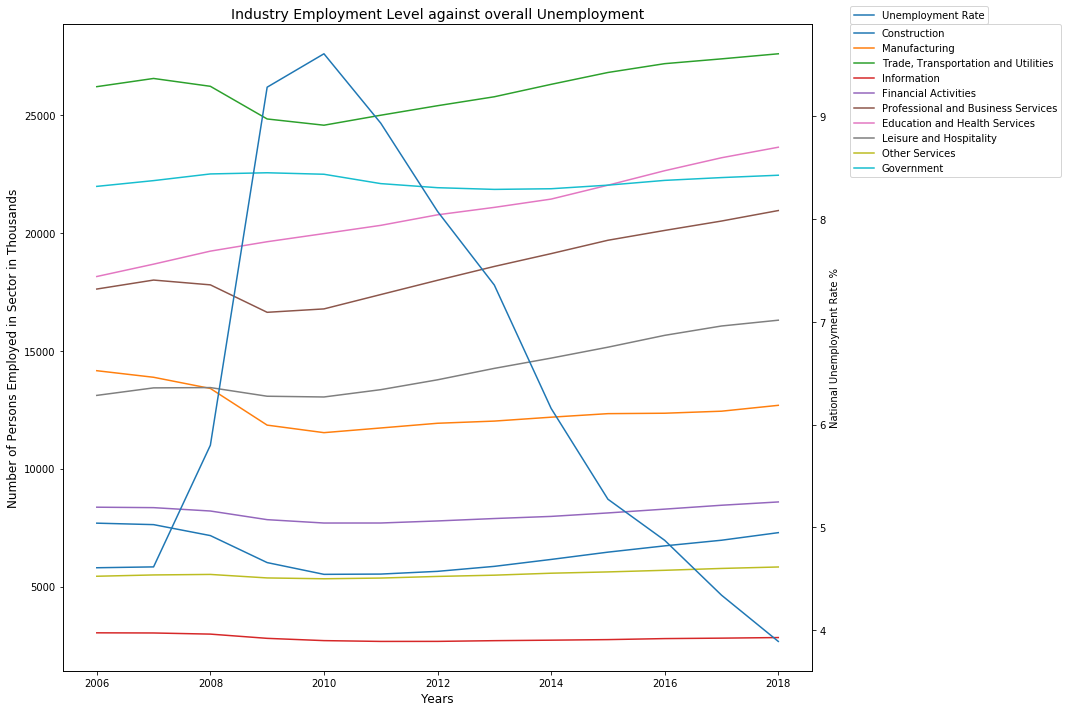

In [71]:
#Plot Industry data and unemployment rate
fig, ax1 = plt.subplots(figsize = (15,10))

#color = 'tab:red'
plt.title(f"Industry Employment Level against overall Unemployment", fontsize=14)
ax1.set_xlabel('Years',fontsize=12)
ax1.set_ylabel('Number of Persons Employed in Sector in Thousands', fontsize=12)

ax1.plot(industryIn_df['Years'], industryIn_df['Construction'], label = 'Construction')
ax1.plot(industryIn_df['Years'], industryIn_df['Manufacturing'], label = 'Manufacturing')
ax1.plot(industryIn_df['Years'], industryIn_df['Trade, Transportation and Utilities'], label = 'Trade, Transportation and Utilities')
ax1.plot(industryIn_df['Years'], industryIn_df['Information'], label = 'Information')
ax1.plot(industryIn_df['Years'], industryIn_df['Financial Activities'], label = 'Financial Activities')
ax1.plot(industryIn_df['Years'], industryIn_df['Professional and Business Services'], label = 'Professional and Business Services')
ax1.plot(industryIn_df['Years'], industryIn_df['Education and Health Services'], label = 'Education and Health Services')
ax1.plot(industryIn_df['Years'], industryIn_df['Leisure and Hospitality'], label = 'Leisure and Hospitality')
ax1.plot(industryIn_df['Years'], industryIn_df['Other Services'], label = 'Other Services')
ax1.plot(industryIn_df['Years'], industryIn_df['Government'], label ='Government')

#Creating legend of the chart
ax1.legend()
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('National Unemployment Rate %')  # we already handled the x-label with ax1
ax2.plot(grouped_layoffsIn['Years'], grouped_layoffsIn['Unemployment Rate for 16yo and over'], label = 'Unemployment Rate')
ax2.legend()
ax2.legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0.)
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

NameError: name 'Years' is not defined

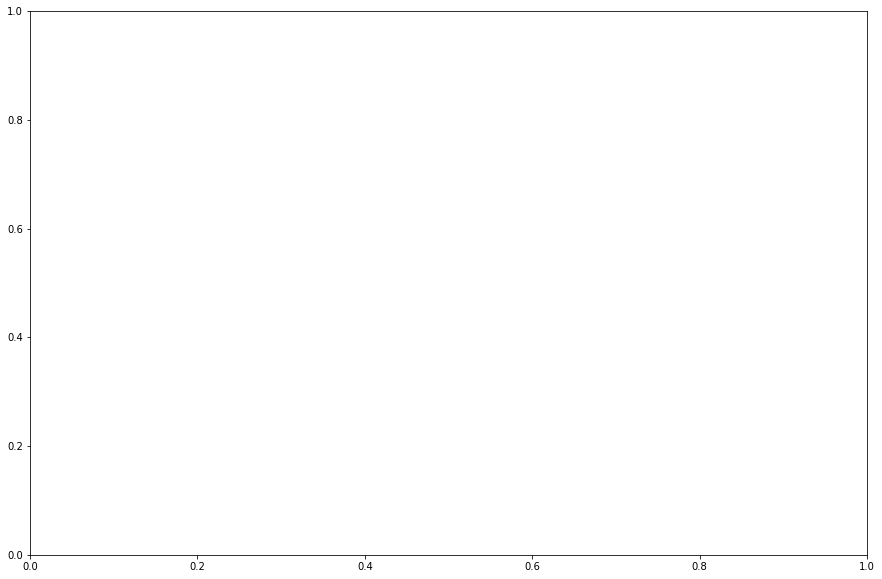

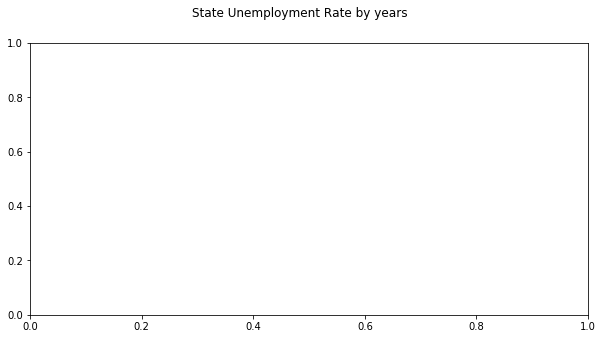

In [72]:
#Plot Industry data and unemployment rate
fig, ax1 = plt.subplots(figsize = (15,10))

fig, ax1 = plt.subplots(sharey=True, figsize=(10,5))

fig.suptitle("State Unemployment Rate by years")

ax1.boxplot([grouped_industryIn[f"{Years}"] for year in grouped_industryIn.iloc[:,2:-1].columns])
ax1.set_ylabel("Unemployment Rate (%)")
ax1.set_xticklabels(grouped_industryIn.iloc[:,2:-1].columns)
ax1.set_xlabel("Year")

plt.savefig("Combined_Ouput_File/State Unemployment Rate by Years.png")

plt.show()

In [ ]:
states2_df = pd.read_csv("Combined_Ouput_File/state_unemployment_monthly.csv")

states2_df.drop(["Year"], axis=1, inplace=True)

fig, ax1 = plt.subplots(sharey=True, figsize=(15,5))

fig.suptitle("State Unemployment Rate by state")

ax1.boxplot([states2_df[f"{state}"] for state in states2_df.iloc[:,1:].columns])
ax1.set_ylabel("Unemployment Rate (%)")
ax1.set_xticklabels(states2_df.iloc[:,1:].columns, rotation="vertical")
ax1.set_xlabel("State")

plt.savefig("Combined_Ouput_File/State Unemployment Rate by State.png")

plt.show()

In [ ]:
grouped_industry2 = industry_df.groupby(['Years','Periods','Months']).mean()
grouped_industry2 = grouped_industry2.reset_index()
#grouped_industry2.head(13)

In [ ]:
# Output industry File (CSV)
output_industry2_file = "output/industry2.csv"

#city data into a .csv.
grouped_industry2.to_csv(output_industry2_file,index=False)